<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [17]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 2: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

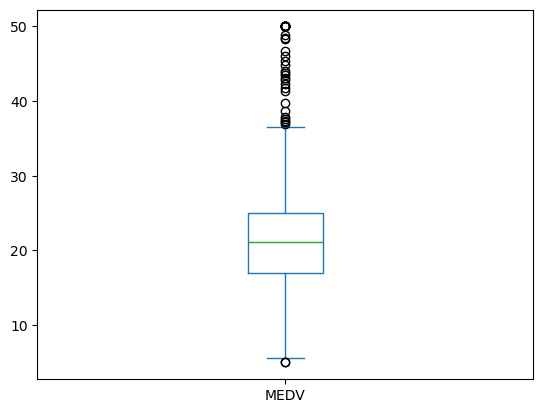

In [7]:
df['MEDV'].plot(kind="box")
plt.show()

### Provide a  bar plot for the Charles river variable

<Axes: xlabel='CHAS'>

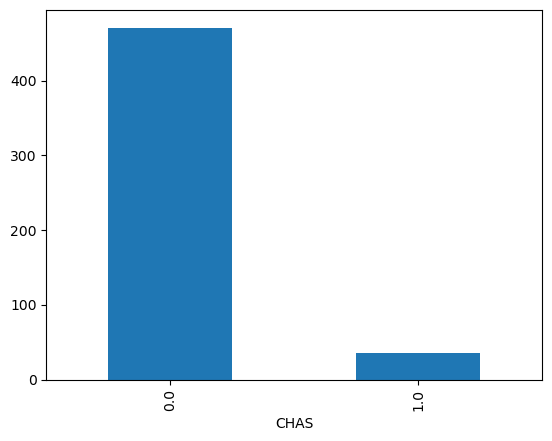

In [11]:
df['CHAS'].value_counts().plot(kind="bar")

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


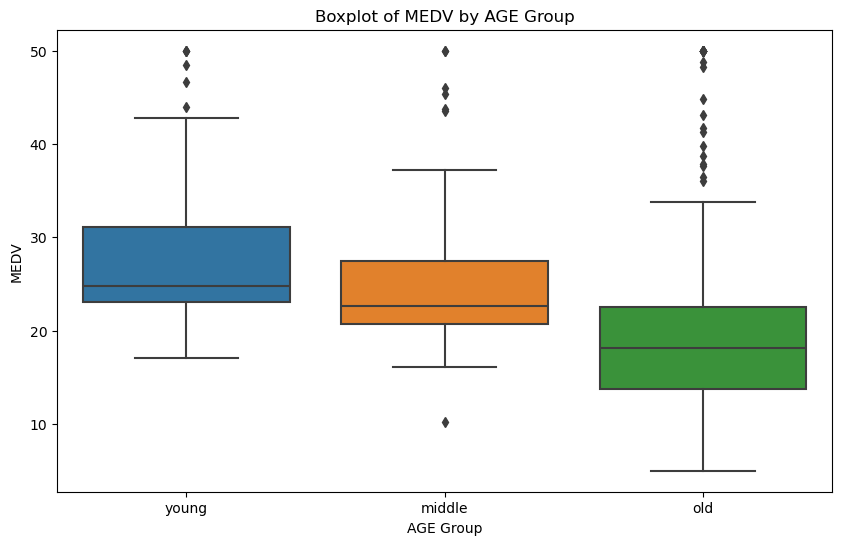

In [21]:
# df["AGE_1"] = np.where(df["AGE"] <=35, "young", "middle")
# df["AGE_1"] = np.where(df["AGE"] >=70, "old", df["AGE_1"])
# sns.boxplot(data=df, x="MEDV", hue="AGE_1")
age_bins = [0, 35, 70, np.inf]
age_labels = ['young', 'middle', 'old']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)
# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AGE_GROUP', y='MEDV', order=age_labels)
plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

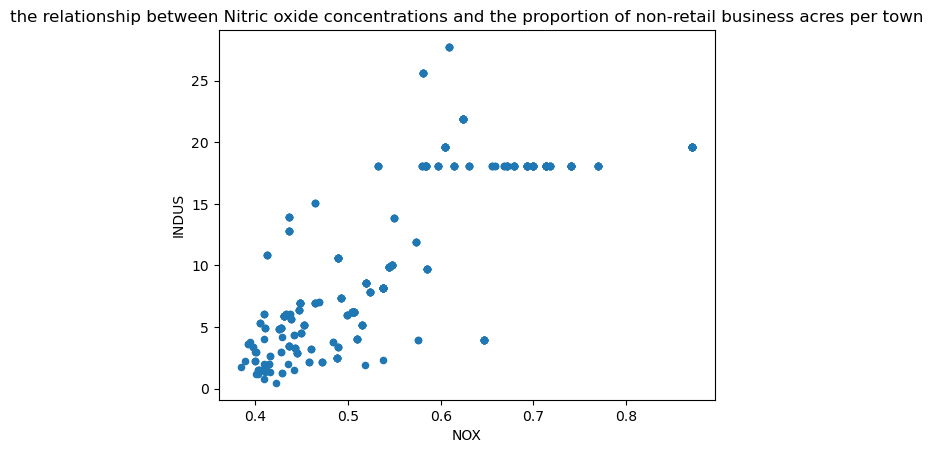

In [23]:
df.plot(kind="scatter", x="NOX", y="INDUS", title="the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

#### from the scatter, we can conclude that there is a strong positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Create a histogram for the pupil to teacher ratio variable

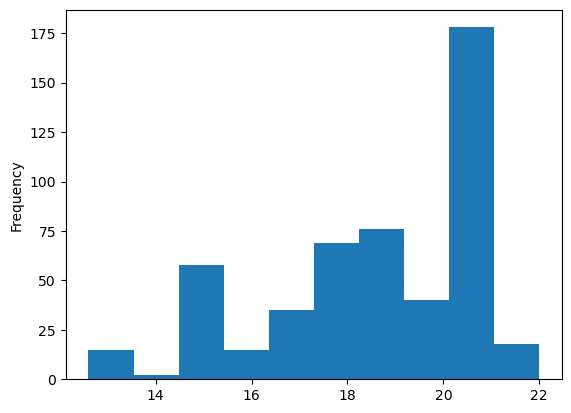

In [25]:
df['PTRATIO'].plot(kind="hist")
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis
* $H_0: a =b $ (there is no difference)
* $H_1:$ a != b

In [29]:
a = df[df['CHAS']==1.0]['MEDV']
b = df[df['CHAS']==0.0]['MEDV']
scipy.stats.levene(a, b, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398632)

In [30]:
scipy.stats.ttest_ind(a, b, equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519902e-05, df=504.0)

#### from the t test, we can get a conclution that the Charles river or not may have an influence in the median value of houses

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: a = b= c $ (there is no difference)
* $H_1:$ at least one is not equal

In [34]:
a = df[df['AGE_1']=="young"]["MEDV"]
b = df[df['AGE_1']=="middle"]["MEDV"]
c = df[df['AGE_1']=="old"]["MEDV"]

In [35]:
scipy.stats.levene(a, b, c, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259189)

In [36]:
f_statistic, p_value = scipy.stats.f_oneway(a, b, c)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion: Since the p-value is smaller than 0.05, we will  reject the null hypothesis and think there is significant evidence in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis
* $H_0:  $ (there is no relationship)
* $H_1:$ there is some relationship

In [37]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241171e-98)

#### the p value is less than 0.05, we reject H0 and think there is a positive relationship in the two viariable

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<Axes: xlabel='DIS', ylabel='MEDV'>

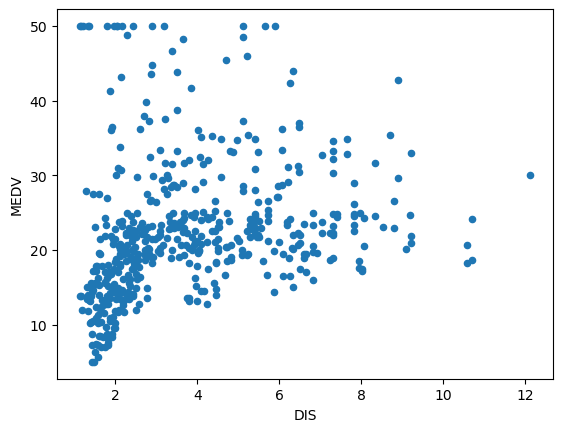

In [40]:
df.plot(kind="scatter", x="DIS", y="MEDV")

In [39]:
## X is the input variables (or independent variables)
X = df['DIS']
## y is the target/dependent variable
y = df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        10:06:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's